# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Arthur REGOUT 90832200

Part. 2: Valère PLATIAUX 90682100

Part. 3: Philippine MARCHAND 49912200

Part. 4: Sosthène MAUS 80342100

Part. 5: Jean DE WALQUE

Part. 6: Gaston DE CUMONT 64062200


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [2]:
# Set visualization style


# Load datasets
# Assuming the datasets are named 'BeijingPM.csv' and 'ShanghaiPM.csv'
beijing_df = pd.read_csv('BeijingPM.csv')
shanghai_df = pd.read_csv('ShanghaiPM.csv')

# Display first few rows to understand the data structure
print("Beijing Data:")
print(beijing_df.head())
print("\nShanghai Data:")
print(shanghai_df.head())

# Filter data between 1/1/2012 and 31/12/2015
def filter_date(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    start_date = pd.to_datetime('2012-01-01')
    end_date = pd.to_datetime('2015-12-31 23:00:00')
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

beijing_filtered = filter_date(beijing_df)
shanghai_filtered = filter_date(shanghai_df)

# Remove rows with NA in PM2.5
beijing_filtered = beijing_filtered.dropna(subset=['PM_US Post'])
shanghai_filtered = shanghai_filtered.dropna(subset=['PM_US Post'])
beijing_filtered.to_csv('stats_beijing_test_3.3.csv', index=False)


# Merge datasets on date
merged_df = pd.merge(beijing_filtered, shanghai_filtered, on='date', suffixes=('_Beijing', '_Shanghai'))

# Keep only rows where PM2.5 is available for both cities
merged_df = merged_df.dropna(subset=['PM_US Post_Beijing', 'PM_US Post_Shanghai'])

# Split data into winter (season=4) and summer (season=2) for both cities
winter_beijing = merged_df[merged_df['season_Beijing'] == 4]['PM_US Post_Beijing']
summer_beijing = merged_df[merged_df['season_Beijing'] == 2]['PM_US Post_Beijing']

winter_shanghai = merged_df[merged_df['season_Shanghai'] == 4]['PM_US Post_Shanghai']
summer_shanghai = merged_df[merged_df['season_Shanghai'] == 2]['PM_US Post_Shanghai']

print(f"Winter Beijing samples: {winter_beijing.shape[0]}")
print(f"Summer Beijing samples: {summer_beijing.shape[0]}")
print(f"Winter Shanghai samples: {winter_shanghai.shape[0]}")
print(f"Summer Shanghai samples: {summer_shanghai.shape[0]}")

Beijing Data:
   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [3]:
# Calculate statistics
def calculate_statistics(series):
    return {
        'Mean': series.mean(),
        'Variance': series.var(),
        'Median': series.median(),
        '25% Quantile': series.quantile(0.25),
        '75% Quantile': series.quantile(0.75)
    }

# Compute statistics for each sample
stats_winter_beijing = calculate_statistics(winter_beijing)
stats_summer_beijing = calculate_statistics(summer_beijing)
stats_winter_shanghai = calculate_statistics(winter_shanghai)
stats_summer_shanghai = calculate_statistics(summer_shanghai)

# Create a DataFrame to display the results
stats_df = pd.DataFrame({
    'Beijing Winter': stats_winter_beijing,
    'Beijing Summer': stats_summer_beijing,
    'Shanghai Winter': stats_winter_shanghai,
    'Shanghai Summer': stats_summer_shanghai
})

# Transpose for better readability
stats_df = stats_df.transpose()

# Display the table
print(stats_df)

                       Mean      Variance  Median  25% Quantile  75% Quantile
Beijing Winter   122.404926  15602.260067    82.0          21.0         180.0
Beijing Summer    71.840843   2978.227347    59.0          30.0         100.0
Shanghai Winter   76.270071   3310.005657    60.0          36.0          99.0
Shanghai Summer   33.891807    611.481485    29.0          16.0          46.0


Comments here:
* **Mean** : We can clearly see through the mean that the baseline polution is higher in Beijing than in Shangai. Further analysis shows us that in both cities, pollution is approximatively twice higher during the winter than in the summer. For Beijing, the paper "PM2.5 Data Reliability, Consistency and Air Quality Assessment in Five Chinese Cities" gives us a really good explanation of the numbers we are seeing. In fact, along with Shenyang, Beijing uses a centralized coal heating system which seems to produce high levels of polution. Through the examination of the Figure 6 of the paper, we see that the region where Shangai is placed is using very high level's of coal, diesel and petrol during the winter. While the paper does not specify when these energy sources are most consumed, we can assume that a significant portion is used during winter for heating systems.
* **Variance** : Beijing winter's variance is particularly high with a value of 15602.26 which indicates a high variability in the measurments. The paper doesn't give enough informations to explain such hign levels of variability. Lower values during the summer for both cities can be explained through a less variable wheather and fewer big meteorological envents. 

* **Median** : Same analysis applies here as for the mean. 

* **25% and 75% Quantile** : These figures support the hypothesis of high measurement variability in Beijing, particularly during winter, as previously discussed. Measurements are widely spread around the mean of 122. In contrast, Shanghai’s quantiles are much closer together.


-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



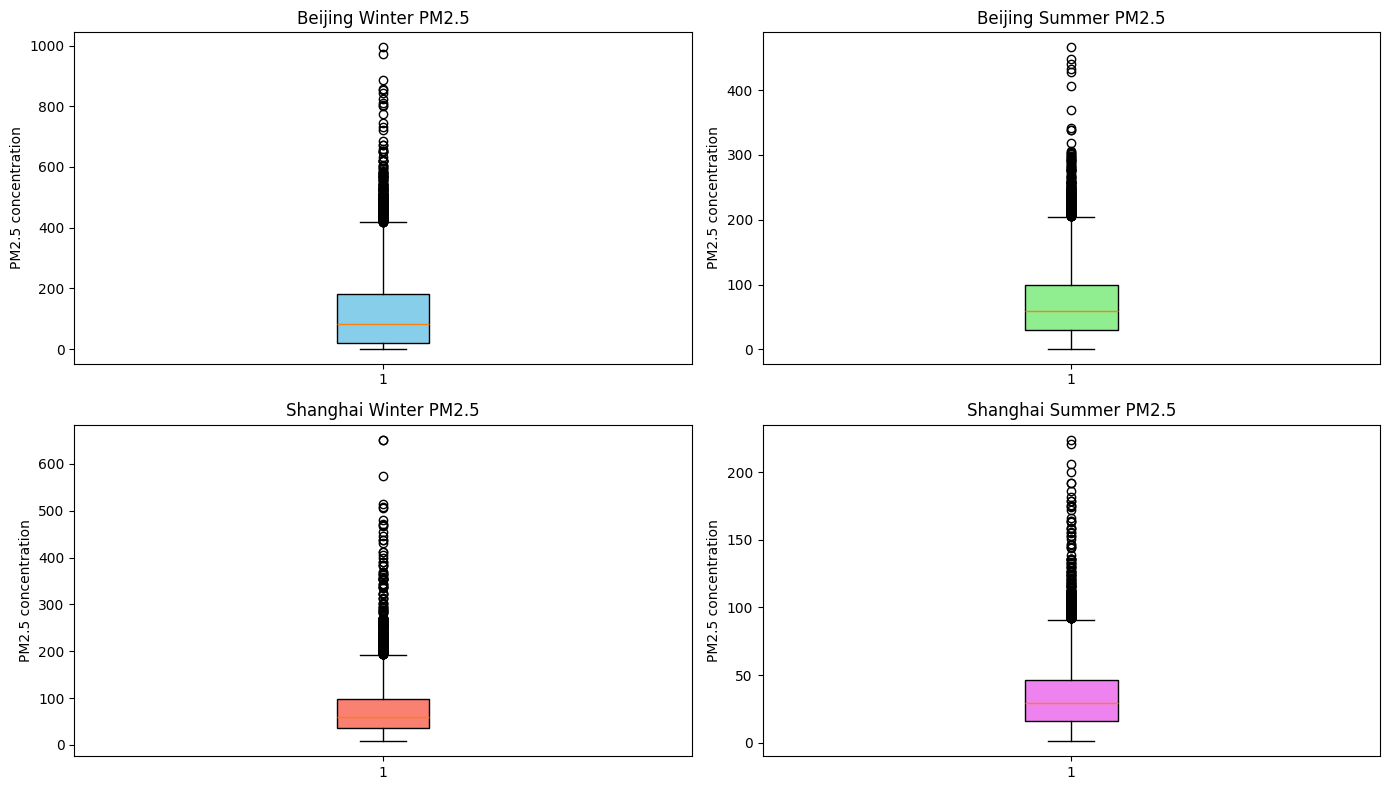

Recommended Maximum Levels by WHO: 5 µg/m³
Annual Mean PM2.5: 10 µg/m³
24-hour Mean PM2.5: 25 µg/m³


In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create box plots using matplotlib
plt.subplot(2, 2, 1)
plt.boxplot(winter_beijing, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Beijing Winter PM2.5')
plt.ylabel('PM2.5 concentration')

plt.subplot(2, 2, 2)
plt.boxplot(summer_beijing, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Beijing Summer PM2.5')
plt.ylabel('PM2.5 concentration')

plt.subplot(2, 2, 3)
plt.boxplot(winter_shanghai, patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Shanghai Winter PM2.5')
plt.ylabel('PM2.5 concentration')

plt.subplot(2, 2, 4)
plt.boxplot(summer_shanghai, patch_artist=True, boxprops=dict(facecolor='violet'))
plt.title('Shanghai Summer PM2.5')
plt.ylabel('PM2.5 concentration')

plt.tight_layout()
plt.show()

# Recommended maximum levels
print("Recommended Maximum Levels by WHO: 5 µg/m³")
print("Annual Mean PM2.5: 10 µg/m³")
print("24-hour Mean PM2.5: 25 µg/m³")

Comments here:
* **Comparison with WHO guidelines** : Regardless of the season or the city, the recommended annual and 24 hour recommendations are far exceeded. Even the lower quartiles (bottom 25% of data) are well above the guidelines.

* **Seasonal Differences** : 
*Beijing* : The median PM2.5 concentration in Beijing during winter is significantly higher than in summer, suggesting a seasonal impact, likely due to heating needs that rely on pollution-intensive fuels as discussed in the previous question. Winter pollution levels in Beijing are higher than in any other season-city combination, indicating substantial air quality deterioration during colder months.
*Shanghai*: While Shanghai also experiences higher pollution in winter compared to summer, the difference is less pronounced than in Beijing. This could reflect a less intensive reliance on high-emission heating or regional differences in pollutant sources and weather patterns which confirms the above observations and the fact that, contrary to Beijing, Shanghai does not use a centralized coal heating system.

* **Outliers and variability** : We discussed the high variance of Beijing above and this figure confirms this. Some outliers are indicating high peaks of pollution. In comparaison, Shanghai also has outliers during the winter and the summer, but fewer and less intense. The lower variability for summer in both cities could be explained by a combination of fewer emissions from heating system's and steadier wheather conditions. 

* **Median and quartile analysis** :
*Beijing* : The median PM2.5 concentration for Beijing in winter is substantially higher than in summer, as reflected by the higher placement of the boxplot and the spread of the interquartile range (IQR). This confirms that air quality is worse during the winter, with measurements more dispersed, implying larger day-to-day variations.
*Shanghai*: In Shanghai, while the median PM2.5 concentration in winter is also higher than in summer, the difference is less extreme than in Beijing. Additionally, the IQR in both seasons is narrower, suggesting a more consistent level of pollution.

## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [5]:
# Define the seasons for filtering: 1 - Winter (Dec, Jan, Feb), 3 - Summer (Jun, Jul, Aug)
beijing_winter = winter_beijing
beijing_summer = summer_beijing
shanghai_winter = winter_shanghai
shanghai_summer = summer_shanghai

# We only keep positive PM2.5 values, as Gamma distribution is defined on (0, ∞)
beijing_winter = beijing_winter[beijing_winter > 0]
beijing_summer = beijing_summer[beijing_summer > 0]
shanghai_winter = shanghai_winter[shanghai_winter > 0]
shanghai_summer = shanghai_summer[shanghai_summer > 0]

# Function to fit gamma distribution and calculate MLE and log-likelihood
def fit_gamma_distribution(data):
    # Fit gamma distribution to data with floc=0 (location forced to zero)
    params = stats.gamma.fit(data, floc=0)
    # Calculate log-likelihood
    log_likelihood = np.sum(stats.gamma.logpdf(data, *params))
    return params, log_likelihood

# Fit the Gamma distribution for each case
beijing_winter_params, beijing_winter_ll = fit_gamma_distribution(beijing_winter)
beijing_summer_params, beijing_summer_ll = fit_gamma_distribution(beijing_summer)
shanghai_winter_params, shanghai_winter_ll = fit_gamma_distribution(shanghai_winter)
shanghai_summer_params, shanghai_summer_ll = fit_gamma_distribution(shanghai_summer)

# Compile results into a clean table format
results = {
    'City': ['Beijing', 'Beijing', 'Shanghai', 'Shanghai'],
    'Season': ['Winter', 'Summer', 'Winter', 'Summer'],
    'Shape (k)': [beijing_winter_params[0], beijing_summer_params[0], shanghai_winter_params[0], shanghai_summer_params[0]],
    'Scale (θ)': [beijing_winter_params[2], beijing_summer_params[2], shanghai_winter_params[2], shanghai_summer_params[2]],
    'Log-Likelihood': [beijing_winter_ll, beijing_summer_ll, shanghai_winter_ll, shanghai_summer_ll]
}

# Convert results to a DataFrame for better presentation
results_df = pd.DataFrame(results)
results_df


,City,Season,Shape (k),Scale (θ),Log-Likelihood
0,Beijing,Winter,0.939867,130.236466,-48091.586067
1,Beijing,Summer,1.700798,42.239487,-43175.928971
2,Shanghai,Winter,2.250154,33.895495,-42926.791179
3,Shanghai,Summer,1.758744,19.270458,-36870.989338


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

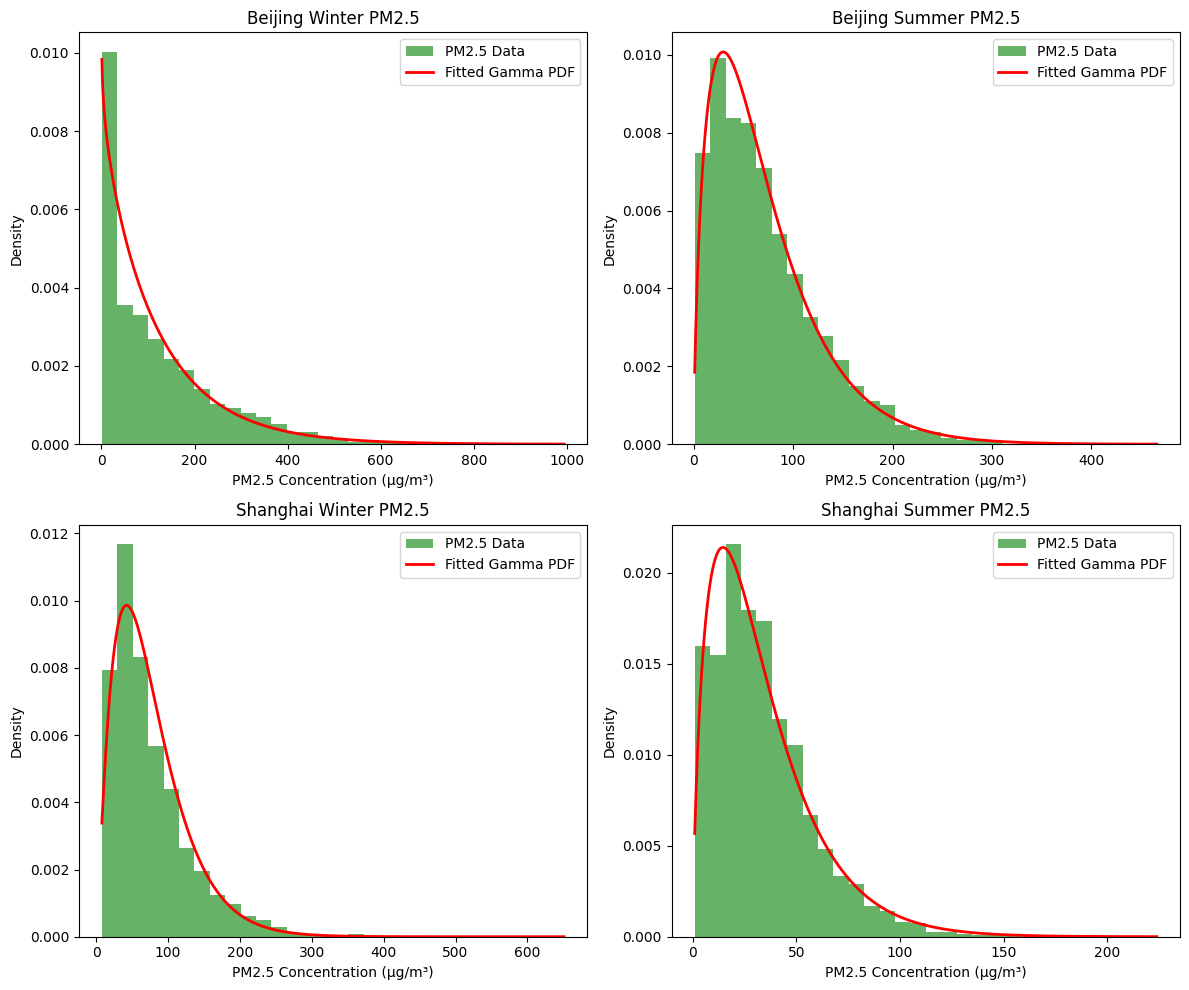

In [6]:
# Function to plot histogram and Gamma PDF
def plot_histogram_with_gamma(data, params, title):
    # Plot histogram of data
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="PM2.5 Data")
    
    # Create a range of values for x-axis
    x = np.linspace(min(data), max(data), 1000)
    
    # Plot the Gamma PDF using the fitted parameters
    plt.plot(x, stats.gamma.pdf(x, a=params[0], loc=0, scale=params[2]), 'r-', lw=2, label="Fitted Gamma PDF")
    plt.title(title)
    plt.xlabel('PM2.5 Concentration (µg/m³)')
    plt.ylabel('Density')
    plt.legend()

# Create the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms and fitted PDFs for Beijing Winter, Beijing Summer, Shanghai Winter, and Shanghai Summer
plt.subplot(2, 2, 1)
plot_histogram_with_gamma(beijing_winter, beijing_winter_params, "Beijing Winter PM2.5")

plt.subplot(2, 2, 2)
plot_histogram_with_gamma(beijing_summer, beijing_summer_params, "Beijing Summer PM2.5")

plt.subplot(2, 2, 3)
plot_histogram_with_gamma(shanghai_winter, shanghai_winter_params, "Shanghai Winter PM2.5")

plt.subplot(2, 2, 4)
plot_histogram_with_gamma(shanghai_summer, shanghai_summer_params, "Shanghai Summer PM2.5")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Comments here:
* **Beijing Winter**:
The shape parameter (k) is less than 1, which indicates a highly skewed distribution with a long tail. The PM2.5 concentrations are mostly concentrated around low values, but there are some extreme high values stretching the distribution tail.
The log-likelihood is relatively low, indicating a moderate fit with the Gamma distribution.

* **Beijing Summer**:
With a shape parameter (k) greater than 1, the distribution becomes more balanced, though still skewed. PM2.5 concentrations are more evenly spread across moderate values.
The scale (θ) is smaller, suggesting lower PM2.5 concentrations in the summer.
The log-likelihood is slightly better than in winter, reflecting a somewhat better fit for the Gamma distribution.

* **Shanghai Winter**:
A larger shape (k) (2.25) indicates a more symmetric distribution, closer to a normal shape. PM2.5 concentrations are more centered around the mean.
The scale (θ) is smaller compared to Beijing, meaning that PM2.5 levels are generally lower in Shanghai during winter.
The log-likelihood is quite similar to the other seasons, but the distribution seems to fit better due to a better shape match.

* **Shanghai Summer**:
The shape (k) is similar to Beijing Summer, but the scale (θ) is even smaller, indicating that PM2.5 concentrations are generally lower in Shanghai during the summer.
The log-likelihood is the best here, suggesting that the Gamma model fits the Shanghai summer PM2.5 data relatively well.

------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [7]:
# Function to calculate mean, standard deviation, and percentiles for Gamma distribution
def calculate_gamma_statistics(params):
    shape, loc, scale = params
    mean = shape * scale
    std_dev = np.sqrt(shape) * scale
    percentiles = [stats.gamma.ppf(q, a=shape, loc=loc, scale=scale) for q in [0.25, 0.5, 0.75]]
    return mean, std_dev, percentiles

# Calculate for each distribution (Beijing Winter/Summer, Shanghai Winter/Summer)
beijing_winter_stats = calculate_gamma_statistics(beijing_winter_params)
beijing_summer_stats = calculate_gamma_statistics(beijing_summer_params)
shanghai_winter_stats = calculate_gamma_statistics(shanghai_winter_params)
shanghai_summer_stats = calculate_gamma_statistics(shanghai_summer_params)

# Create a DataFrame to compare the results
gamma_stats = {
    'City': ['Beijing', 'Beijing', 'Shanghai', 'Shanghai'],
    'Season': ['Winter', 'Summer', 'Winter', 'Summer'],
    'Mean (Gamma)': [beijing_winter_stats[0], beijing_summer_stats[0], shanghai_winter_stats[0], shanghai_summer_stats[0]],
    'Std Dev (Gamma)': [beijing_winter_stats[1], beijing_summer_stats[1], shanghai_winter_stats[1], shanghai_summer_stats[1]],
    '25th Percentile (Gamma)': [beijing_winter_stats[2][0], beijing_summer_stats[2][0], shanghai_winter_stats[2][0], shanghai_summer_stats[2][0]],
    '50th Percentile (Gamma)': [beijing_winter_stats[2][1], beijing_summer_stats[2][1], shanghai_winter_stats[2][1], shanghai_summer_stats[2][1]],
    '75th Percentile (Gamma)': [beijing_winter_stats[2][2], beijing_summer_stats[2][2], shanghai_winter_stats[2][2], shanghai_summer_stats[2][2]]
}

# Calculate empirical statistics from the actual data (we recalculate those values (calculated in ex 1.) because we are now using lists instead of dictionaries)
def calculate_empirical_statistics(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    percentiles = np.percentile(data, [25, 50, 75])
    return mean, std_dev, percentiles

# Get empirical statistics for each data set
beijing_winter_empirical = calculate_empirical_statistics(beijing_winter)
beijing_summer_empirical = calculate_empirical_statistics(beijing_summer)
shanghai_winter_empirical = calculate_empirical_statistics(shanghai_winter)
shanghai_summer_empirical = calculate_empirical_statistics(shanghai_summer)

# Add empirical stats to the DataFrame
gamma_stats['Mean (Empirical)'] = [beijing_winter_empirical[0], beijing_summer_empirical[0], 
                                   shanghai_winter_empirical[0], shanghai_summer_empirical[0]]
gamma_stats['Std Dev (Empirical)'] = [beijing_winter_empirical[1], beijing_summer_empirical[1], 
                                      shanghai_winter_empirical[1], shanghai_summer_empirical[1]]
gamma_stats['25th Percentile (Empirical)'] = [beijing_winter_empirical[2][0], beijing_summer_empirical[2][0], 
                                              shanghai_winter_empirical[2][0], shanghai_summer_empirical[2][0]]
gamma_stats['50th Percentile (Empirical)'] = [beijing_winter_empirical[2][1], beijing_summer_empirical[2][1], 
                                              shanghai_winter_empirical[2][1], shanghai_summer_empirical[2][1]]
gamma_stats['75th Percentile (Empirical)'] = [beijing_winter_empirical[2][2], beijing_summer_empirical[2][2], 
                                              shanghai_winter_empirical[2][2], shanghai_summer_empirical[2][2]]

# Convert to DataFrame for easy comparison
comparison_df = pd.DataFrame(gamma_stats)
comparison_df[['City', 'Season', 'Mean (Gamma)', 'Mean (Empirical)', 
               'Std Dev (Gamma)', 'Std Dev (Empirical)', 
               '25th Percentile (Gamma)', '25th Percentile (Empirical)', 
               '50th Percentile (Gamma)', '50th Percentile (Empirical)', 
               '75th Percentile (Gamma)', '75th Percentile (Empirical)']]


,City,Season,Mean (Gamma),Mean (Empirical),Std Dev (Gamma),Std Dev (Empirical),25th Percentile (Gamma),25th Percentile (Empirical),50th Percentile (Gamma),50th Percentile (Empirical),75th Percentile (Gamma),75th Percentile (Empirical)
0,Beijing,Winter,122.404926,122.404926,126.259989,124.901467,32.991858,21.0,82.709766,82.0,169.698824,180.0
1,Beijing,Summer,71.840843,71.840843,55.086481,54.569850,31.494866,30.0,58.356072,59.0,97.712423,100.0
2,Shanghai,Winter,76.270071,76.270071,50.844978,57.529176,38.889197,36.0,65.317626,60.0,101.848569,99.0
3,Shanghai,Summer,33.891807,33.891807,25.556030,24.726662,15.160290,16.0,27.729424,29.0,46.005220,46.0


Comments here:
1. Mean:
The means for both the Gamma distribution and the empirical data align perfectly across all four cases (Beijing and Shanghai, in winter and summer). This consistency shows that the Gamma distribution is accurately capturing the central tendency of the data in each season and city.
2. Standard Deviation:
Beijing Winter: The Gamma estimate (126.26) is slightly higher than the empirical standard deviation (124.90), indicating a small overestimation of variability.
Beijing Summer: The Gamma and empirical values are closely aligned (55.09 vs. 54.57), showing that the Gamma distribution is a good fit in terms of variability.
Shanghai Winter: The Gamma estimate (50.84) is lower than the empirical standard deviation (57.53), which could imply that the Gamma distribution is underestimating the variability in Shanghai's winter PM2.5 emissions.
Shanghai Summer: The standard deviations are quite close (25.56 vs. 24.73), showing a good fit in terms of variability for summer in Shanghai.
3. Percentiles:
25th Percentile: The Gamma distribution underestimates the 25th percentile in all cases, especially for Beijing Winter (32.99 vs. 21.0), indicating that the distribution has a heavier tail in the lower region than the empirical data.
50th Percentile (Median): Gamma and empirical medians are similar in all cases, which suggests that the distribution’s central values match well with empirical values.
75th Percentile: The Gamma distribution fits the 75th percentile closely, particularly for Shanghai (winter and summer). The match for Beijing in winter and summer is fairly close, but minor discrepancies suggest that the Gamma distribution may slightly underestimate upper-range values in some cases.



------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

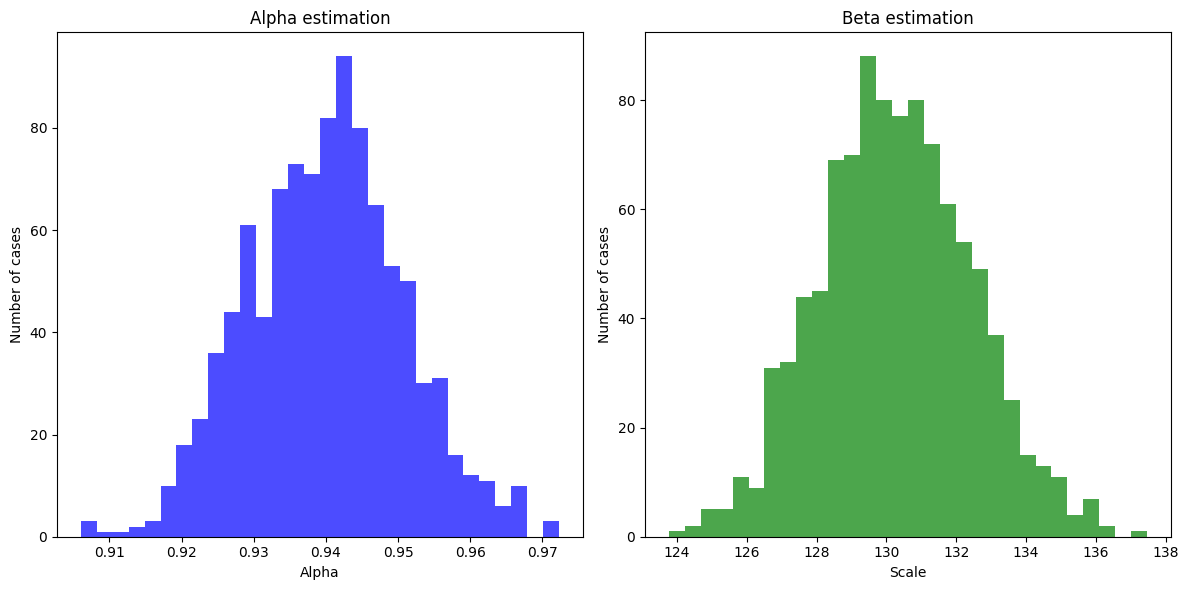

5% Confidence Interval for Alpha: [0.92015285 0.96254297]


In [8]:
# Number of bootstrap samples and sample size for each
n_bootstrap_samples = 1000
sample_size = 6000

# Store bootstrap results
alpha_estimates = []
scale_estimates = []

# Perform bootstrapping
for i in range(n_bootstrap_samples):
    # Resample 6000 values with replacement from Beijing winter data
    bootstrap_sample = np.random.choice(beijing_winter, size=sample_size, replace=True)
    
    # Fit a Gamma distribution to the resampled data (MLE with floc=0)
    alpha, loc, scale = stats.gamma.fit(bootstrap_sample, floc=0)
    
    # Store the estimates of alpha and scale
    alpha_estimates.append(alpha)
    scale_estimates.append(scale)

# Convert to numpy arrays for easier computation
alpha_estimates = np.array(alpha_estimates)
scale_estimates = np.array(scale_estimates)

# Plot histograms of alpha and scale estimates
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(alpha_estimates, bins=30, color='blue', alpha=0.7, label="Alpha Estimates")
plt.title("Alpha estimation")
plt.xlabel("Alpha")
plt.ylabel("Number of cases")

plt.subplot(1, 2, 2)
plt.hist(scale_estimates, bins=30, color='green', alpha=0.7, label="Scale Estimates")
plt.title("Beta estimation")
plt.xlabel("Scale")
plt.ylabel("Number of cases")

plt.tight_layout()
plt.show()

# Calculate the 5% confidence intervals for alpha and scale
alpha_ci = np.percentile(alpha_estimates, [2.5, 97.5])
scale_ci = np.percentile(scale_estimates, [2.5, 97.5])

alpha_ci, scale_ci

print("5% Confidence Interval for Alpha:", alpha_ci)

Comments here:
1. Histograms of the Bootstrapped Alpha and Scale Estimates:
Alpha (Shape) Estimates: The histogram of the alpha estimates is roughly bell-shaped and symmetric. The majority of estimates fall between 0.92 and 0.97, indicating a consistent estimate for the shape parameter across bootstrapped samples.
Scale Estimates: The scale estimates also exhibit a normal-like distribution centered around 126 to 130, showing stable and consistent results across the 1000 bootstraps.
2. 5% Confidence Interval for Alpha:
The 95% confidence interval for the alpha parameter is [0.920, 0.962].
This interval is relatively narrow, indicating that the estimates of the alpha parameter are fairly precise, and there isn't much variability in the bootstrapped results.
The confidence interval suggests that we can be 95% confident that the true value of the alpha parameter for Beijing winter PM2.5 emissions lies within this range.
3. Interpretation of Accuracy:
Given the narrow confidence interval and the symmetric shape of the histograms, we can conclude that the MLE estimates for both the alpha and scale parameters are accurate and stable.
The consistent results across the 1000 bootstrapped samples indicate that the MLE method is robust and provides reliable parameter estimates for the Gamma distribution fitted to the Beijing winter PM2.5 data.
The overall accuracy is good, with minimal variability in both the shape (alpha) and scale estimates.

## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [9]:
#Code here

beijing_filtered = beijing_filtered[beijing_filtered['season'] == 4]

# Remove rows with NaN entries
beijing_filtered = beijing_filtered.dropna()

# Convert 'cbwd' to dummy variables and drop one modality to avoid multicollinearity
beijing_winter_filtrated_for_Q3 = pd.get_dummies(beijing_filtered, columns=['cbwd'], drop_first=True)
beijing_winter_filtrated_for_Q3.to_csv('stats_beijing_test.csv', index=False)

# Variables explicatives et variable cible
X = beijing_winter_filtrated_for_Q3[['DEWP', 'TEMP', 'HUMI', 'PRES', 'Iws', 'precipitation', 'cbwd_cv', 'cbwd_NW', 'cbwd_SE']]  # Vous pouvez avoir des noms de variables différentes après la conversion de cbwd
y = beijing_winter_filtrated_for_Q3['PM_US Post']

# Ajout d'une constante pour le modèle
X = sm.add_constant(X)

X['DEWP'] = pd.to_numeric(X['DEWP'], errors='coerce')
X['TEMP'] = pd.to_numeric(X['TEMP'], errors='coerce')
X['HUMI'] = pd.to_numeric(X['HUMI'], errors='coerce')
X['PRES'] = pd.to_numeric(X['PRES'], errors='coerce')
X['Iws'] = pd.to_numeric(X['Iws'], errors='coerce')
X['cbwd_cv'] = pd.to_numeric(X['DEWP'], errors='coerce')
X['cbwd_NW'] = pd.to_numeric(X['DEWP'], errors='coerce')
X['cbwd_SE'] = pd.to_numeric(X['DEWP'], errors='coerce')
X['precipitation'] = pd.to_numeric(X['precipitation'], errors='coerce')
# Répétez pour chaque variable dummy de 'cbwd'


# Régression linéaire
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:02:37   Log-Likelihood:                -24701.
No. Observations:                4193   AIC:                         4.942e+04
Df Residuals:                    4186   BIC:                         4.946e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1211.1313    255.857      4.734

Comments here:

The regression model shows an R-squared of 0.449, meaning 45% of the variability in PM2.5 levels is explained by weather factors.

* Temperature (TEMP) and Humidity (HUMI) positively and significantly affect PM2.5 (p < 0.001).
* Pressure (PRES), Wind Speed (Iws), and Precipitation have negative, significant impacts (p < 0.001), with precipitation showing a strong reduction effect on PM2.5 levels (-257.99).
* Wind direction (cbwd) is not significant.

------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [10]:

# Utilisation du dataframe fourni
beijing_filtered['date'] = pd.to_datetime(beijing_filtered[['year', 'month', 'day', 'hour']])
beijing_filtered.set_index('date', inplace=True)

# Considération des émissions de PM2.5 au poste de l'ambassade des États-Unis entre le 1/1/2012 et le 31/12/2015
dataset = beijing_filtered[(beijing_filtered.index >= '2012-01-01') & (beijing_filtered.index <= '2015-12-31')]

# Création de la série temporelle des émissions PM2.5
emissions = dataset['PM_US Post'].dropna()

# Préparation des données avec les retards
emissions_lags = pd.DataFrame({'E(t)': emissions})
for lag in range(1, 4):
    emissions_lags[f'E(t-{lag})'] = emissions.shift(lag)

# Suppression des valeurs manquantes
emissions_lags.dropna(inplace=True)

# Séparation des données en ensembles d'entraînement (75%) et de validation (25%)
train_size = int(len(emissions_lags) * 0.75)
train_set = emissions_lags.iloc[:train_size]
val_set = emissions_lags.iloc[train_size:]

# Variables pour l'entraînement (E(t-1), E(t-2), E(t-3)) et la variable cible (E(t))
X_train = train_set[['E(t-1)', 'E(t-2)', 'E(t-3)']]
y_train = train_set['E(t)']
X_val = val_set[['E(t-1)', 'E(t-2)', 'E(t-3)']]
y_val = val_set['E(t)']

# Estimation du modèle auto-régressif avec statsmodels
X_train = sm.add_constant(X_train)  # Ajouter une constante pour le modèle
model = sm.OLS(y_train, X_train).fit()

# Analyse des statistiques du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   E(t)   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:02:37   Log-Likelihood:                -15134.
No. Observations:                3129   AIC:                         3.028e+04
Df Residuals:                    3125   BIC:                         3.030e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3850      0.779      6.916      0.0

Comments here:

The autoregressive model explains 92.9% of the variance in PM2.5 emissions (R-squared = 0.929), indicating a strong fit to the training data.

**Coefficients and Significance:**
* E(t-1) has a positive and significant coefficient (1.1446), showing that recent past emissions have a strong positive impact on current emissions.
* E(t-2) and E(t-3) have negative but weaker effects (-0.1496 and -0.0417, respectively), suggesting a slight corrective trend over time.
* Constant: The intercept (5.3850) is statistically significant, indicating a baseline emission level.

**Model Statistics:**
* The F-statistic (1.363e+04) with a p-value of 0.00 shows the model is statistically significant.
* Durbin-Watson close to 2 suggests low autocorrelation in residuals, a good sign for time series models.

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

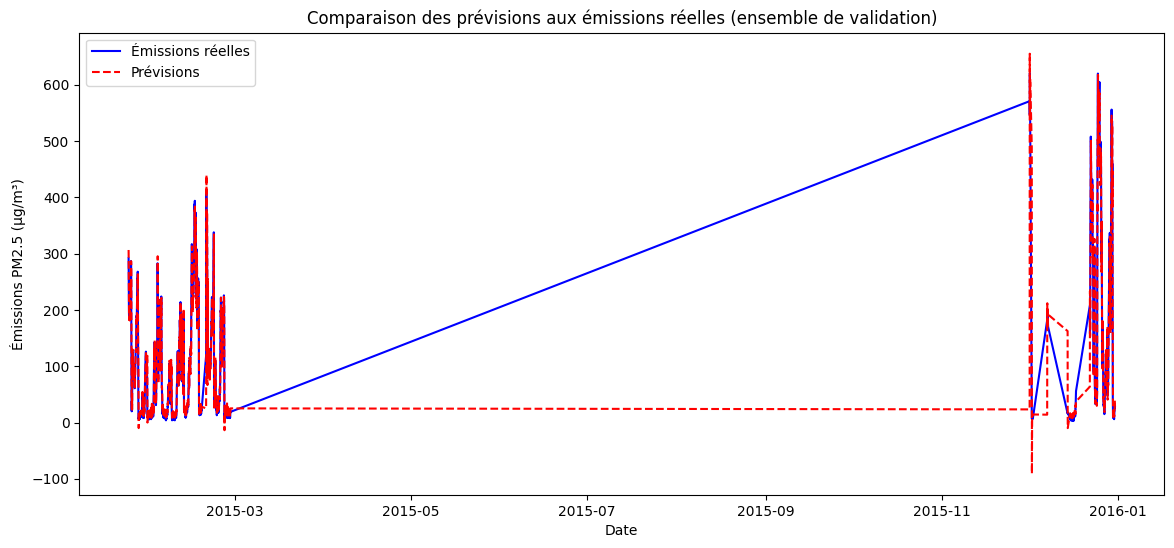

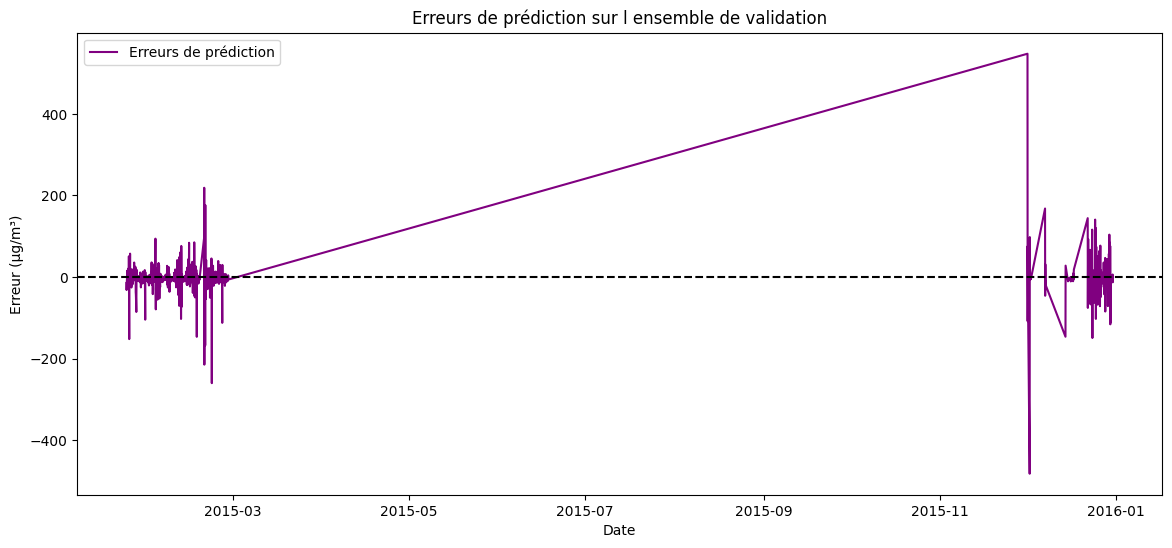

Mean Absolute Error (MAE) sur l ensemble d entraînement : 16.29
Mean Absolute Error (MAE) sur l ensemble de validation : 17.64


In [11]:
# Prédiction sur l'ensemble de validation
X_val = sm.add_constant(X_val)  # Ajouter une constante pour l'ensemble de validation
val_predictions = model.predict(X_val)

# Comparaison des prévisions aux émissions réelles sur un graphique
plt.figure(figsize=(14, 6))
plt.plot(val_set.index, y_val, label='Émissions réelles', color='blue')
plt.plot(val_set.index, val_predictions, label='Prévisions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Émissions PM2.5 (µg/m³)')
plt.title('Comparaison des prévisions aux émissions réelles (ensemble de validation)')
plt.legend()
plt.show()

# Graphique des erreurs de prédiction
errors = y_val - val_predictions
plt.figure(figsize=(14, 6))
plt.plot(val_set.index, errors, label='Erreurs de prédiction', color='purple')
plt.xlabel('Date')
plt.ylabel('Erreur (µg/m³)')
plt.title('Erreurs de prédiction sur l ensemble de validation')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()

# Calcul du MAE sur les ensembles d'entraînement et de validation
train_predictions = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_predictions)
mae_val = mean_absolute_error(y_val, val_predictions)

print(f'Mean Absolute Error (MAE) sur l ensemble d entraînement : {mae_train:.2f}')
print(f'Mean Absolute Error (MAE) sur l ensemble de validation : {mae_val:.2f}')

Comment here : 

## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

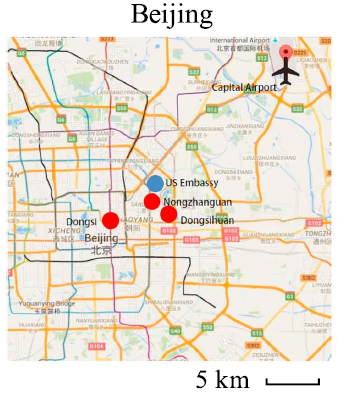


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [12]:
# Load the Beijing data
beijing_df = pd.read_csv('BeijingPM.csv')

# Filter data between 1/1/2012 and 31/12/2015
def filter_date(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    start_date = pd.to_datetime('2012-01-01')
    end_date = pd.to_datetime('2015-12-31 23:59:59')
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Apply date filtering
beijing_filtered = filter_date(beijing_df)

# Keep only the winter season (season = 4)
beijing_winter = beijing_filtered[beijing_filtered['season'] == 4]

# Remove rows with missing data in both PM_Nongzhanguan and PM_US Post
beijing_cleaned = beijing_winter.dropna(subset=['PM_Nongzhanguan', 'PM_US Post'])

# Display the cleaned data (first few rows)
print(beijing_cleaned.head())

          No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
26694  26695  2013      1   17     6       4       25.0            NaN   
26695  26696  2013      1   17     7       4       22.0            NaN   
26696  26697  2013      1   17     8       4       20.0            NaN   
26697  26698  2013      1   17     9       4       24.0            NaN   
26698  26699  2013      1   17    10       4       27.0            NaN   

       PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
26694             20.0        34.0 -17.0  56.0  1038.0 -10.0   NW   4.92   
26695             20.0        33.0 -16.0  52.0  1039.0  -8.0   NE   4.92   
26696             27.0        33.0 -16.0  45.0  1040.0  -6.0   NE   8.94   
26697             28.0        34.0 -16.0  38.0  1040.0  -4.0   NE  12.07   
26698             15.0        38.0 -16.0  35.0  1040.0  -3.0   NE  16.09   

       precipitation  Iprec                date  
26694            0.0    0.0 2013-01-17 06:00:00 

b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [13]:
# Confidence level is 5% (0.05)
alpha = 0.05
# Check the assumptions


# Check the normality distribution of the data
# Perform the Anderson-Darling test for normality
anderson_nongzhanguan = stats.anderson(beijing_cleaned['PM_Nongzhanguan'], dist='norm')
anderson_us_post = stats.anderson(beijing_cleaned['PM_US Post'], dist='norm')

# Check if the test statistic is greater than the critical value at 5% significance level
if anderson_nongzhanguan.statistic > anderson_nongzhanguan.critical_values[2]:  # index 2 corresponds to 5% significance level
    print("PM_Nongzhanguan is not normally distributed.")
else:
    print("PM_Nongzhanguan is normally distributed.")

if anderson_us_post.statistic > anderson_us_post.critical_values[2]:
    print("PM_US Post is not normally distributed.")
else:
    print("PM_US Post is normally distributed.")

# Check if the variances are equal
levene_test = stats.levene(beijing_cleaned['PM_Nongzhanguan'], beijing_cleaned['PM_US Post'])
if levene_test.pvalue < alpha:
    print("The variances of the two data series are not equal.")
else:
    print("The variances of the two data series are equal.")

# Perform the Student's T-test
t_stat, p_value = stats.ttest_ind(beijing_cleaned['PM_Nongzhanguan'], beijing_cleaned['PM_US Post'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check the condition for rejecting the null hypothesis 
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in average PM2.5 levels between Nongzhanguan and US Embassy.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in average PM2.5 levels between Nongzhanguan and US Embassy.")

PM_Nongzhanguan is not normally distributed.
PM_US Post is not normally distributed.
The variances of the two data series are not equal.
T-statistic: -3.661707972656801
P-value: 0.0002516497324604815
Reject the null hypothesis (H0): There is a significant difference in average PM2.5 levels between Nongzhanguan and US Embassy.


Comment here:
We can see that the null hypothesis is rejected. That means that the average hourly PM2.5 emissions aren't the same in Nongzhanguan and at the US embassy. All the assumptions required to perform this test aren't sastisfied, samples do not follow a normal distribution. The data are not independent either : we calculate PM2.5 emissions in very close geographical areas, so we can consider that the data are matched. And we also can see that the variances are not equal. The Student's T test is inappropriate for our test.

c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:
The Wilcoxon sign-rank test checks whether the mean values of two dependent groups differ significantly from each other (DATAtab). The main advantage is that the samples do not have to follow a normal distribution. It is useful in our project beacause, as mentioned earlier, our samples do not follow a normal distribution and do not meet the prerequisites for the Student's T test.

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [14]:
#Perform the Wilcoxon-test (for dependant data)
stat_wilcoxon, p_value_wilcoxon = stats.wilcoxon(beijing_cleaned['PM_Nongzhanguan'], beijing_cleaned['PM_US Post'])

#Print the results
print(f"Wilcoxon statistic: {stat_wilcoxon}")
print(f"P-value: {p_value_wilcoxon}")

#Confidence level is 5% (0.05)
alpha = 0.05
# Check the condition for rejecting the null hypothesis 
if p_value_wilcoxon < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")


Wilcoxon statistic: 4283393.0
P-value: 2.7876634046482492e-186
Reject the null hypothesis (H0)


Comment here:
Note that using the Wilcoxon test, the null hypothesis is also rejected. This means that the averages of the 2 data series are indeed different.

